This project was inspired by the "Analyse your own Netflix data" workshop organized by Codecademy.

In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

I will not be uploading my Netflix ViewingActivity.csv data to github but you can request your own Netflix ViewingActivity.csv on this link: https://www.netflix.com/account/getmyinfo . That way you can analyze your own data.

In [2]:
# load in the data obtained from Netflix about your viewing activity
df = pd.read_csv('ViewingActivity.csv')

In [3]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dora,2022-11-03 12:22:42,00:08:22,NaN,Titans: Season 2: Deathstroke (Episode 5),NaN,Edge OSS - Windows (Cadmium),00:10:18,00:10:18,GB (United Kingdom)
1,Dora,2022-11-03 12:22:26,00:00:05,Autoplayed: user action: None;,Sniper: Ultimate Kill_hook_primary_16x9,HOOK,Edge OSS - Windows (Cadmium),00:00:05,00:00:05,GB (United Kingdom)
2,Dora,2022-11-03 11:10:56,00:00:55,NaN,Titans: Season 2: Deathstroke (Episode 5),NaN,Edge OSS - Windows (Cadmium),00:01:58,Not latest view,GB (United Kingdom)
3,Dora,2022-11-03 10:10:16,00:13:36,NaN,Titans: Season 2: Aqualad (Episode 4),NaN,iPad Air 2 WiFi,00:40:54,00:40:54,GB (United Kingdom)
4,Dora,2022-11-02 17:11:14,00:06:42,NaN,Titans: Season 2: Aqualad (Episode 4),NaN,Edge OSS - Windows (Cadmium),00:27:18,Not latest view,GB (United Kingdom)


In [4]:
df.shape

(10934, 10)

In [5]:
# renaming the columns
df.columns = ['name', 'start', 'duration', 'attrs', 'title', 'svt', 'device', 'bookmark', 'latestbookmark', 'country'] 

In [6]:
# selecting my Netflix profile
df = df[df.name == 'Dora']

In [7]:
df.head()

,name,start,duration,attrs,title,svt,device,bookmark,latestbookmark,country
0,Dora,2022-11-03 12:22:42,00:08:22,NaN,Titans: Season 2: Deathstroke (Episode 5),NaN,Edge OSS - Windows (Cadmium),00:10:18,00:10:18,GB (United Kingdom)
1,Dora,2022-11-03 12:22:26,00:00:05,Autoplayed: user action: None;,Sniper: Ultimate Kill_hook_primary_16x9,HOOK,Edge OSS - Windows (Cadmium),00:00:05,00:00:05,GB (United Kingdom)
2,Dora,2022-11-03 11:10:56,00:00:55,NaN,Titans: Season 2: Deathstroke (Episode 5),NaN,Edge OSS - Windows (Cadmium),00:01:58,Not latest view,GB (United Kingdom)
3,Dora,2022-11-03 10:10:16,00:13:36,NaN,Titans: Season 2: Aqualad (Episode 4),NaN,iPad Air 2 WiFi,00:40:54,00:40:54,GB (United Kingdom)
4,Dora,2022-11-02 17:11:14,00:06:42,NaN,Titans: Season 2: Aqualad (Episode 4),NaN,Edge OSS - Windows (Cadmium),00:27:18,Not latest view,GB (United Kingdom)


In [8]:
# dropping irrelevant columns 
df = df.drop(['name', 'attrs', 'svt', 'bookmark', 'latestbookmark', 'device', 'country'], axis=1)

In [9]:
# determining missing values - no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5745 entries, 0 to 5744
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   start     5745 non-null   object
 1   duration  5745 non-null   object
 2   title     5745 non-null   object
dtypes: object(3)
memory usage: 179.5+ KB


In [10]:
# overview of the final dataset
df.head()

,start,duration,title
0,2022-11-03 12:22:42,00:08:22,Titans: Season 2: Deathstroke (Episode 5)
1,2022-11-03 12:22:26,00:00:05,Sniper: Ultimate Kill_hook_primary_16x9
2,2022-11-03 11:10:56,00:00:55,Titans: Season 2: Deathstroke (Episode 5)
3,2022-11-03 10:10:16,00:13:36,Titans: Season 2: Aqualad (Episode 4)
4,2022-11-02 17:11:14,00:06:42,Titans: Season 2: Aqualad (Episode 4)


In [12]:
# looking at some data highlights
df.describe()

# the top result for title is "Princess Mononoke" which suggests that I watched this film the most
# the top result for duration is 4 seconds
  # this is not the actual watchtime - the actual watchtime will be the sum of duration (I rarely finish movies on Netflix in one go)

,start,duration,title
count,5745,5745,5745
unique,5736,1650,2139
top,2022-02-02 13:26:04,00:00:04,Princess Mononoke
freq,2,158,16


Determining the top 5 most rewatched titles

In [13]:
# value_counts() counts unique values (in this case it counts unique values in the column title)
# using .head() means that we will be looking only at the top 5 re-watched titles
toptitles = df.title.value_counts().head()

In [14]:
# the titles form the index of the newly created toptitles series
# the count of occurence of the title forms the value of the toptitles series
toptitles

Princess Mononoke                16
The Boss Baby: Get That Baby!    15
Headspace: Unwind Your Mind      13
Fear Street Part 3: 1666         13
Tales from Earthsea              13
Name: title, dtype: int64

In [15]:
# creating a new dataframe that contains the unique titles and the count of times the title has been watched
topdf = pd.DataFrame({'titles': toptitles.index, 'counts': toptitles.values})

In [66]:
# showing the top 5 titles that I have watched the most number of times
topdf.head()

,titles,counts
0,Princess Mononoke,16
1,The Boss Baby: Get That Baby!,15
2,Headspace: Unwind Your Mind,13
3,Fear Street Part 3: 1666,13
4,Tales from Earthsea,13


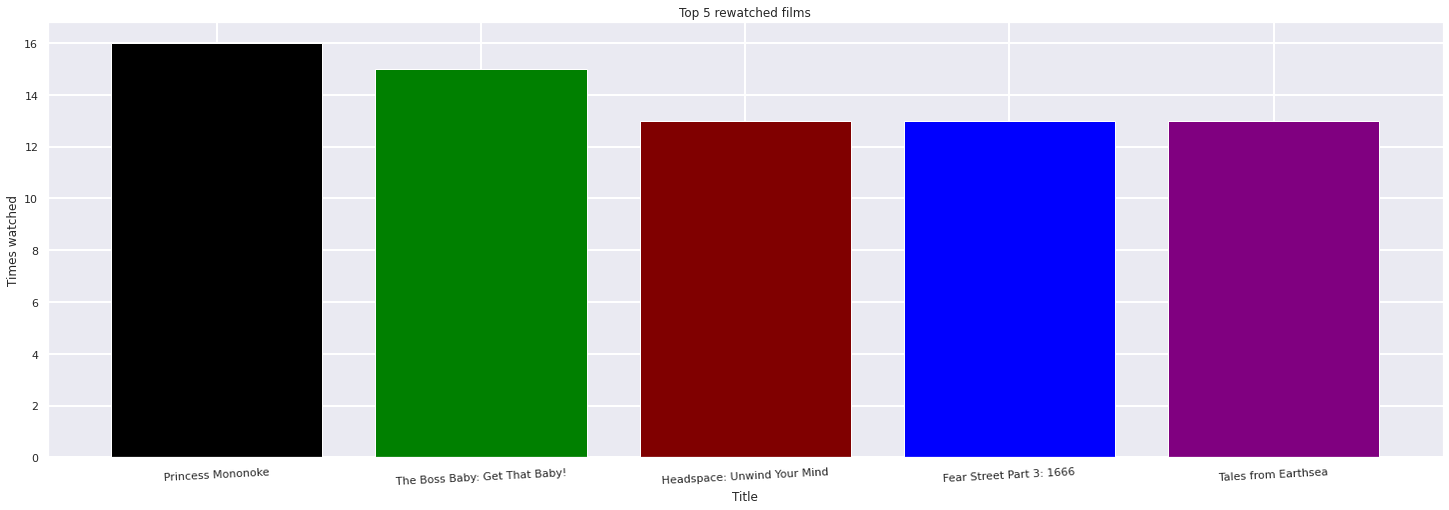

<Figure size 432x288 with 0 Axes>

In [17]:
# visualizing the top 5 titles I have watched the most number of times
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {'grid.linewidth':2}) 

x = topdf.titles
y = topdf.counts

plt.bar(x, y, color=['black', 'green', 'maroon', 'blue', 'purple'])
# colours you can directly access within matplotlib: aqua, black, blue, fuchsia, gray, green, lime, maroon, navy, olive, purple, red, silver, teal, white, yellow 

plt.ylabel('Times watched')
plt.xlabel('Title')
plt.title('Top 5 rewatched films')
plt.xticks(topdf.titles, rotation = 3)

plt.show()
plt.clf()

Creating a function that automates the determination of most rewatched titles

In [74]:
# defining a function that returns a dataframe of the top X values (films or individual series episodes)

def top_titles(dataframe):
  try:
    toptitles = dataframe.title.value_counts().head(int(input('Choose a number of top results: ')))
    topdf = pd.DataFrame({'titles': toptitles.index, 'counts': toptitles.values})
    # creating a column called rank to assign ranks based on the number of times the title was rewatched (counts)
    # setting the rank() method to dense assures that titles that have been rewatched the same number of times get the same rank
    topdf['rank'] = topdf['counts'].rank(method='dense', ascending=False)

    return topdf
  except:
    ValueError
    print('You need to enter an integer')

In [75]:
# testing the function
top_titles(df)

Choose a number of top results: 11


,titles,counts,rank
0,Princess Mononoke,16,1.0
1,The Boss Baby: Get That Baby!,15,2.0
2,Headspace: Unwind Your Mind,13,3.0
3,Fear Street Part 3: 1666,13,3.0
4,Tales from Earthsea,13,3.0
5,Queer Eye: Season 4: A Tale of Two Cultures (E...,12,4.0
6,Queer Eye: Season 1: Saving Sasquatch (Episode 2),12,4.0
7,Parks and Recreation: Season 1_hook_primary_16x9,12,4.0
8,Riverdale: Season 6: Chapter One Hundred and F...,11,5.0
9,Lucifer: Season 5: Family Dinner (Episode 9),11,5.0


Determining my top 5 titles in terms of watchtime

---



In [76]:
# converting duration to timedelta format (Pandas measure of time duration)
df.duration = pd.to_timedelta(df.duration)

In [77]:
# the conversion was successful
df['duration'].head()

0   0 days 00:08:22
1   0 days 00:00:05
2   0 days 00:00:55
3   0 days 00:13:36
4   0 days 00:06:42
Name: duration, dtype: timedelta64[ns]

In [78]:
# summing up watchtime by title
df[['title', 'duration']].groupby('title').sum().sort_values(by='duration', ascending = False).head(5)

,duration
title,
Watchmen,0 days 02:35:30
The Boss Baby: Get That Baby!,0 days 02:32:45
Unbreakable Kimmy Schmidt: Kimmy vs. the Reverend,0 days 02:26:59
Princess Mononoke,0 days 02:12:47
Green Snake,0 days 02:09:36


In my case, the top titles are movies/films or interactive episodes.

Some people may prefer to watch series, so the next few lines of code show how to determine watchtime when consdering a whole series.



In [79]:
# example of determining watchtime (duration) of a series in numerical format
st = df[df.title.str.contains('Unbreakable Kimmy Schmidt', regex=False)]
stduration = st.duration.sum() / pd.Timedelta(hours=1)
print(stduration)

25.43111111111111


In [80]:
# example of determining watchtime (duration) of a series in string format
st = df[df.title.str.contains('Unbreakable Kimmy Schmidt', regex=False)]
stduration = st.duration.sum()
print(stduration)

1 days 01:25:52


Creating functions that automate the determination of watchtime for select series/films

In [81]:
# defining a function that determines the watchtime (DURATION) of ANY SERIES or FILM in the dataset in STRING format
def string_duration(series):
  if not isinstance(series, str):
    print('Given input is not a string')
  else:
    s=df[df.title.str.contains(series, regex=False)]
    sduration = s.duration.sum()
  return sduration


In [82]:
# test on series
string_duration('Unbreakable Kimmy Schmidt')

Timedelta('1 days 01:25:52')

In [83]:
# test on a film/movie
string_duration('Watchmen')

Timedelta('0 days 02:35:30')

In [84]:
# defining a function that determines the watchtime (DURATION) of ANY SERIES or FILM in the dataset in NUMERICAL format
def numerical_duration(series):
  if not isinstance(series, str):
    print('Given input is not a string')
  else:
    s=df[df.title.str.contains(series, regex=False)]
    sduration = s.duration.sum() / pd.Timedelta(hours=1)
  return sduration

In [85]:
# test on a series 
numerical_duration('Unbreakable Kimmy Schmidt')

25.43111111111111

In [86]:
# test on a film/movie 
numerical_duration('Watchmen')

2.591666666666667

In [95]:
# defining a function that allows creating a visual plot for ANY NUMBER of SERIES or FILMS
def general_plot(series):
  if not isinstance(series, list):
    print('Given input is not a list')
  else:
    x=[]
    y=[]
    for i in series:
      x.append(i)
      y.append(numerical_duration(i))
    sns.set_style('darkgrid')
    plt.figure(figsize=(25, 8))
    sns.set_context('notebook', font_scale = 1, rc = {'grid.linewidth':2})
    plt.bar(x, y, color=['black', 'green', 'maroon', 'blue', 'purple'])
    plt.ylabel('Hours watched')
    plt.xlabel('Title')
    plt.title('Films or series watched for a certain duration')
  
  return plt.show()

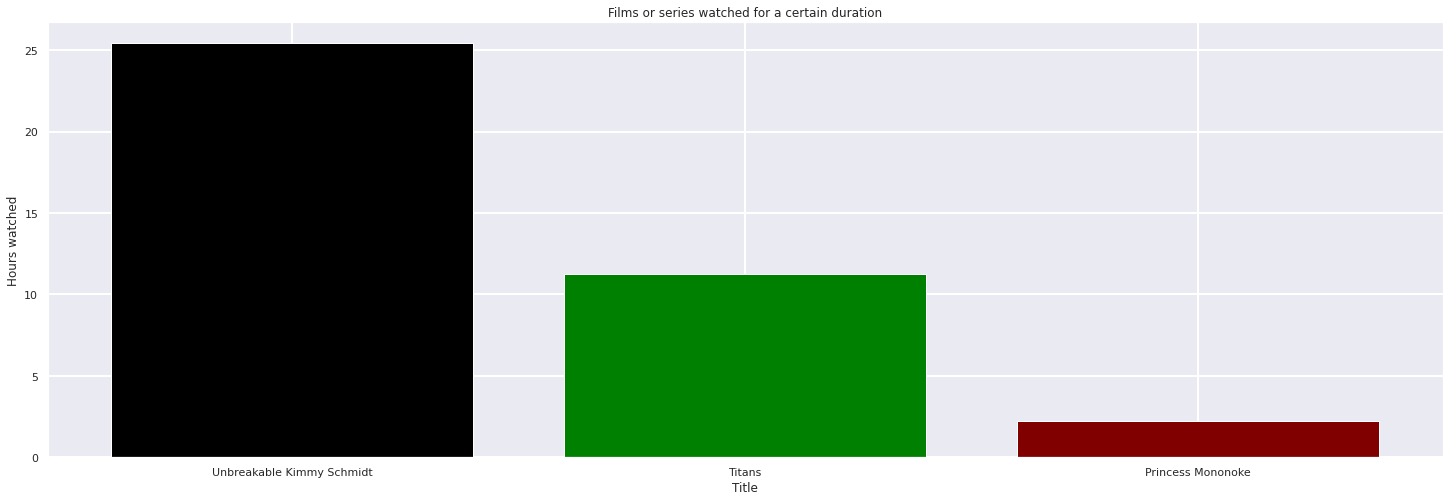

In [96]:
# test that features a list that includes series and films/movies 
shows = ['Unbreakable Kimmy Schmidt', 'Titans', 'Princess Mononoke']
general_plot(shows)